In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plots

# Load cleaned data
df = pd.read_csv("data/cleaned_data.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Reconvert datetime

# Load RFM data
rfm = pd.read_csv("data/rfm_data.csv")

# Quick look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Sales Over Time

Goal: See how sales fluctuate daily or monthly.

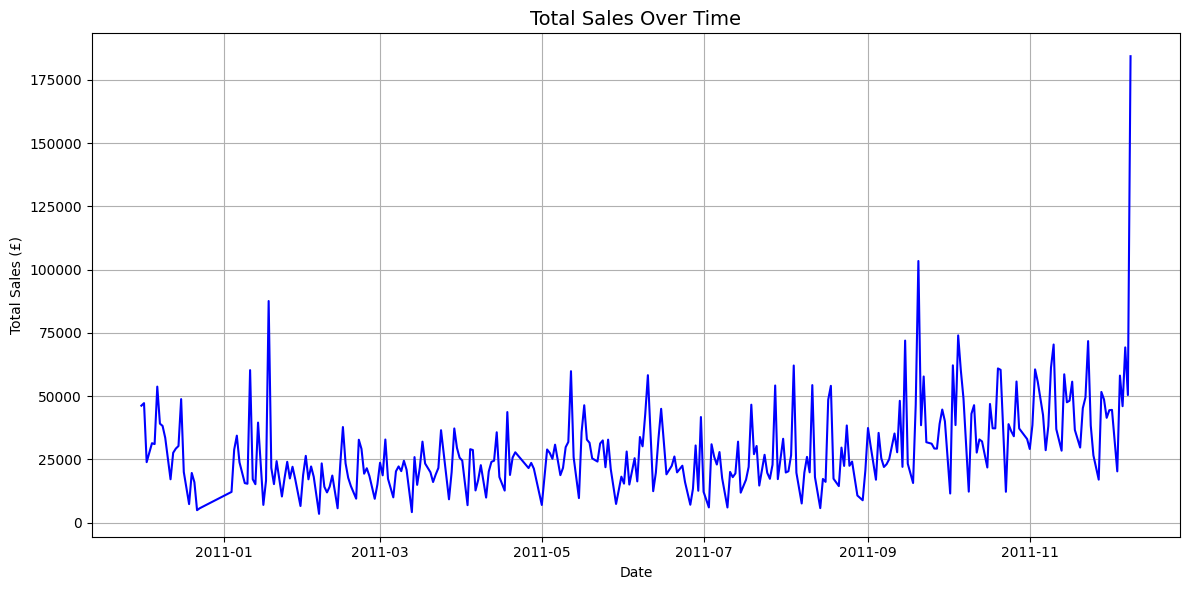

In [8]:
# Create plots directory if it doesn't exist
if not os.path.exists("plots"):
    os.makedirs("plots")

# Aggregate sales by date
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['TotalPrice'], color='blue')
plt.title("Total Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales (£)")
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("plots/sales_over_time.png")
plt.show()

In [6]:
# Check the date range in the dataset
print("Earliest date:", df['InvoiceDate'].min())
print("Latest date:", df['InvoiceDate'].max())

Earliest date: 2010-12-01 08:26:00
Latest date: 2011-12-09 12:50:00


Top 10 Countries by Revenue


Goal: Identify which countries contribute the most to revenue.


C:\Users\adhik\AppData\Local\Temp\ipykernel_25820\3044757293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='TotalPrice', data=country_revenue, palette='viridis')


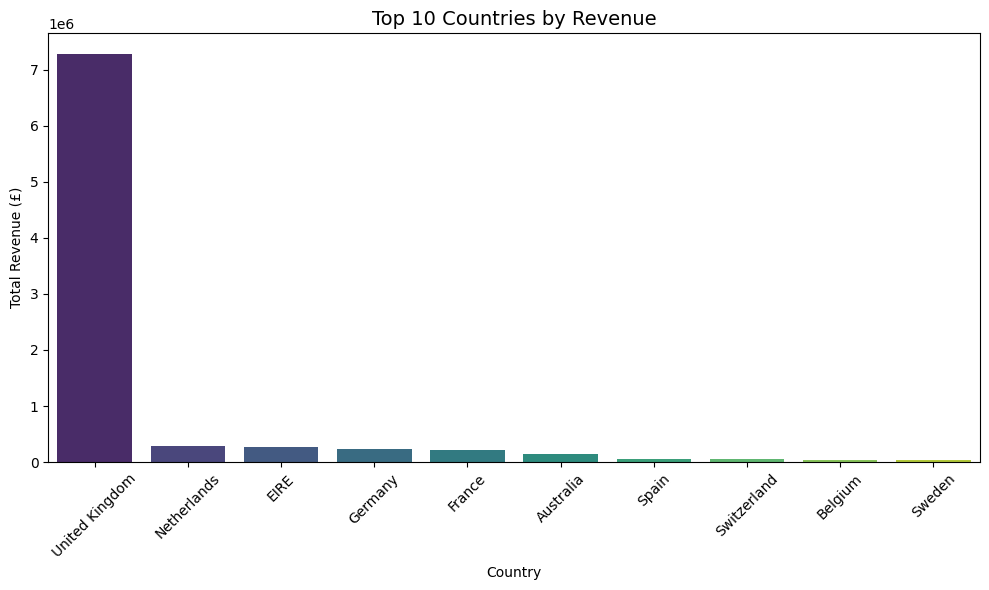

In [9]:
# Aggregate revenue by country
country_revenue = df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='TotalPrice', data=country_revenue, palette='viridis')
plt.title("Top 10 Countries by Revenue", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=45)
plt.tight_layout()

# Save
plt.savefig("plots/top_countries.png")
plt.show()

Plot RFM Distributions

Goal: Understand the spread of Recency, Frequency, and Monetary values.

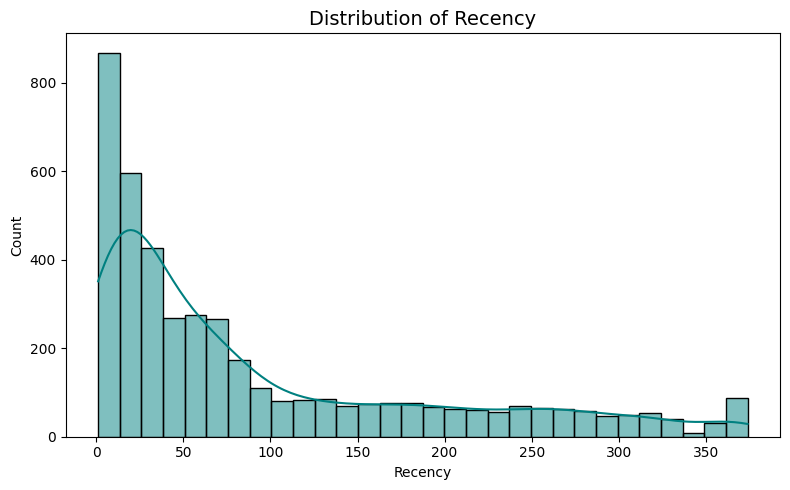

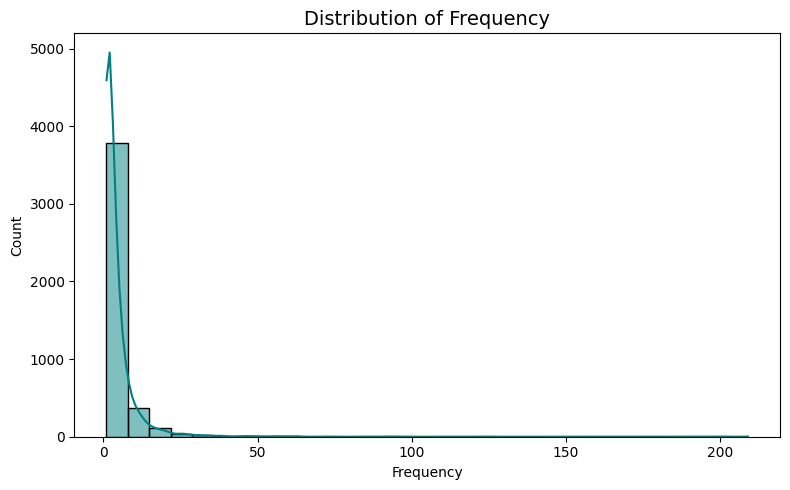

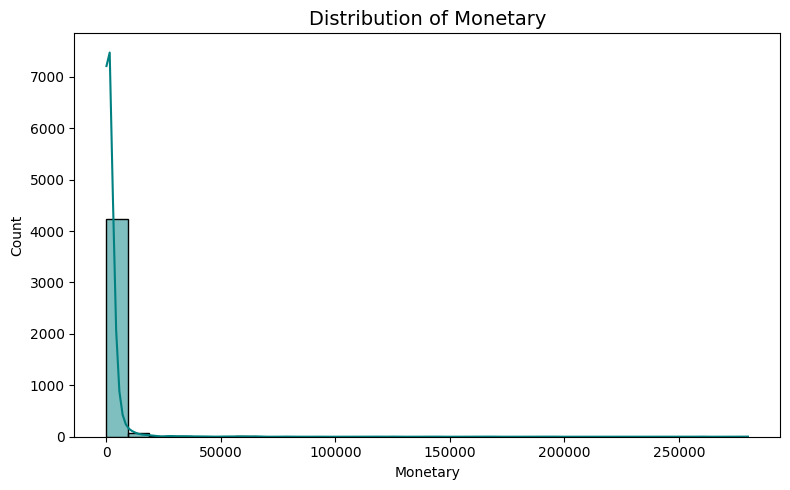

In [11]:
# Plot distributions for RFM
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(8, 5))
    sns.histplot(rfm[col], bins=30, kde=True, color='teal')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"plots/{col}_dist.png")
    plt.show()

Box Plots for Outliers

Goal: Check for outliers in RFM metrics.

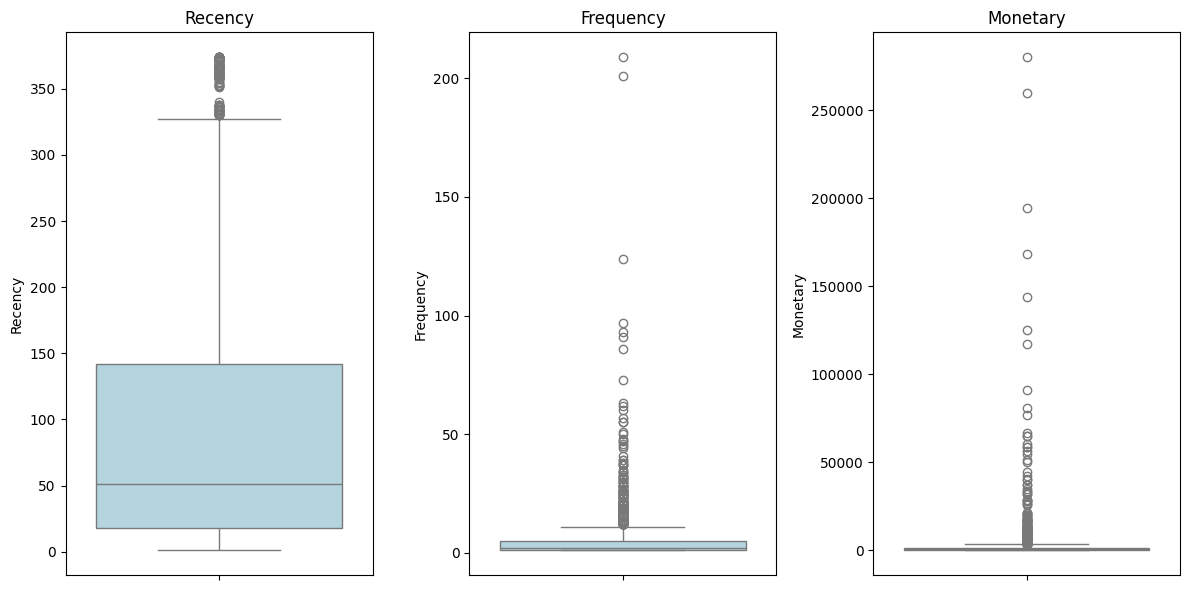

In [12]:
# Box plots for RFM
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=rfm[col], color='lightblue')
    plt.title(f"{col}")
plt.tight_layout()
plt.savefig("plots/rfm_boxplots.png")
plt.show()

# Initial Observations
- Sales spike around late 2011—possibly holiday season.
- The UK dominates revenue, suggesting a local customer base.
- Most customers buy infrequently (low Frequency), but a few spend heavily (high Monetary).